In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/84869/DATA ANALYST/DATA/DataCoSupplyChainDataset.csv", encoding= 'unicode_escape')

In [3]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


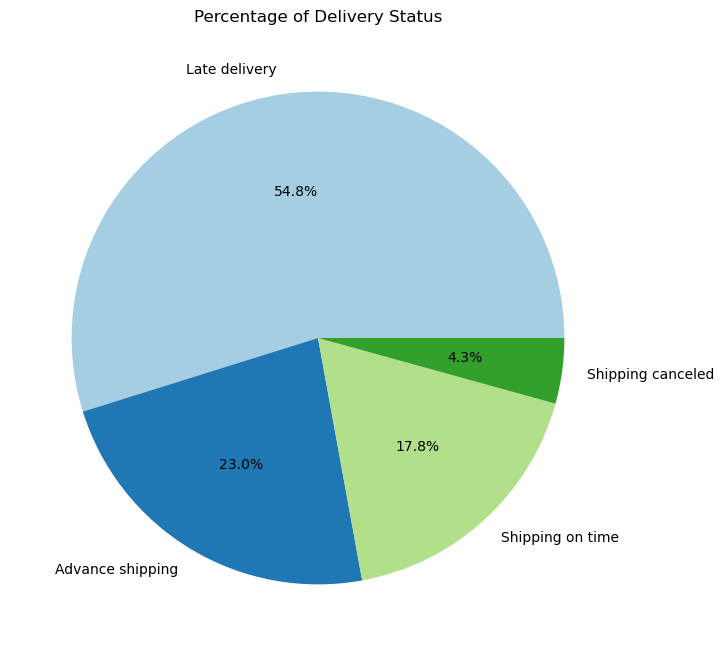

In [10]:
# Tính toán phần trăm
delivery_status_percent = delivery_status_counts / delivery_status_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_percent, labels=delivery_status_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of Delivery Status')
plt.show()

In [11]:
# Lọc 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# In danh sách các biến số
print("Danh sách các biến số:")
print(numerical_columns)
# Lọc 
categorical_columns = df.select_dtypes(include=['object']).columns

# In danh sách các cột phân loại
print("Danh sách các biến phân loại:")
print(categorical_columns)

Danh sách các biến số:
Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status', 'Delivery_Difference'],
      dtype='object')
Danh sách các biến phân loại:
Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Stre

In [12]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Calculate the number of unique values for each categorical variable
unique_counts = df[categorical_columns].nunique()

# Display the results
print(unique_counts)

Type                              4
Delivery Status                   4
Category Name                    50
Customer City                   563
Customer Country                  2
Customer Email                    1
Customer Fname                  782
Customer Lname                 1109
Customer Password                 1
Customer Segment                  3
Customer State                   46
Customer Street                7458
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Image                   118
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
dtype: int64


In [13]:
# Lọc các cột là biến phân loại
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Thống kê số lượng giá trị duy nhất của từng biến phân loại
unique_values_count = df[categorical_columns].nunique()
# In kết quả
print("Số lượng giá trị duy nhất của từng biến phân loại:")
print(unique_values_count)
# Lọc các biến phân loại có số lượng giá trị duy nhất nhỏ hơn 10
small_unique_value_counts = unique_values_count[unique_values_count <= 10]
print(small_unique_value_counts)

Số lượng giá trị duy nhất của từng biến phân loại:
Type                              4
Delivery Status                   4
Category Name                    50
Customer City                   563
Customer Country                  2
Customer Email                    1
Customer Fname                  782
Customer Lname                 1109
Customer Password                 1
Customer Segment                  3
Customer State                   46
Customer Street                7458
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Image                   118
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
dtype: int64
Type                 4
Delivery Status      4
Customer Country     2
Cus

In [14]:
# Chọn các cột số
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Định nghĩa hàm để phát hiện và loại bỏ giá trị ngoại lệ bằng phương pháp IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc bỏ các giá trị ngoại lệ
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outliers

# Tạo một bản sao của dataframe gốc để loại bỏ các giá trị ngoại lệ
df_cleaned = df.copy()

# Kiểm tra và loại bỏ các giá trị ngoại lệ cho mỗi cột số
for col in numerical_columns:
    initial_count = df_cleaned.shape[0]
    
    # Loại bỏ các giá trị ngoại lệ
    df_cleaned = remove_outliers(df_cleaned, col)
    
    final_count = df_cleaned.shape[0]
    removed = initial_count - final_count
    
    print(f"Cột '{col}': Đã loại bỏ {removed} giá trị ngoại lệ")

# Hiển thị dữ liệu đã được làm sạch
print("\nDữ liệu sau khi đã loại bỏ các giá trị ngoại lệ:")
print(df_cleaned.head())

Cột 'Days for shipping (real)': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Days for shipment (scheduled)': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Benefit per order': Đã loại bỏ 18942 giá trị ngoại lệ
Cột 'Sales per customer': Đã loại bỏ 1207 giá trị ngoại lệ
Cột 'Late_delivery_risk': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Category Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Customer Id': Đã loại bỏ 1259 giá trị ngoại lệ
Cột 'Customer Zipcode': Đã loại bỏ 3 giá trị ngoại lệ
Cột 'Department Id': Đã loại bỏ 321 giá trị ngoại lệ
Cột 'Latitude': Đã loại bỏ 7 giá trị ngoại lệ
Cột 'Longitude': Đã loại bỏ 1236 giá trị ngoại lệ
Cột 'Order Customer Id': Đã loại bỏ 180 giá trị ngoại lệ
Cột 'Order Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Cardprod Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Discount': Đã loại bỏ 6956 giá trị ngoại lệ
Cột 'Order Item Discount Rate': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Product Price': Đã loại bỏ 21724 giá trị 

In [15]:
# 1. Kiểm tra giá trị thiếu
missing_threshold = 0.5  # Ngưỡng 50%
missing_data = df.isnull().mean()
columns_to_drop = missing_data[missing_data > missing_threshold].index.tolist()

# 2. Kiểm tra tính đa dạng
for column in df.columns:
    if df[column].nunique() <= 1:  # Nếu chỉ có một giá trị duy nhất
        columns_to_drop.append(column)

# 3. Loại bỏ cột không phải số trước khi tính toán tương quan
df_numeric = df.select_dtypes(include=['number'])  # Chỉ giữ các cột số
correlation_matrix = df_numeric.corr()

# 4. Xóa các cột đã xác định
df_cleaned = df.drop(columns=columns_to_drop)

# In danh sách các cột đã xóa
print("Các cột đã xóa:", columns_to_drop)

# In ma trận tương quan
print("Ma trận tương quan:\n", correlation_matrix)

Các cột đã xóa: ['Order Zipcode', 'Product Description', 'Customer Email', 'Customer Password', 'Product Description', 'Product Status']
Ma trận tương quan:
                                Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Benefit per order                             -0.005101   
Sales per customer                             0.001757   
Late_delivery_risk                             0.401415   
Category Id                                   -0.000348   
Customer Id                                    0.003432   
Customer Zipcode                               0.000112   
Department Id                                 -0.001631   
Latitude                                      -0.004073   
Longitude                                      0.003911   
Order Customer Id                              0.003432   
Order Id                                      -0.001711   
Order Item Cardp

In [16]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [17]:
# Tạo danh sách cho các cột rời rạc và liên tục
discrete_columns = []
continuous_columns = []

# Kiểm tra từng cột trong DataFrame
for column in df.columns:
    # Kiểm tra kiểu dữ liệu
    if pd.api.types.is_numeric_dtype(df[column]):
        # Nếu số lượng giá trị duy nhất nhỏ hơn một ngưỡng nhất định, coi là rời rạc
        if df[column].nunique() < 10:  # Thay đổi ngưỡng nếu cần
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)
    else:
        # Nếu không phải kiểu số, coi là cột rời rạc
        discrete_columns.append(column)

# In kết quả
print("Cột rời rạc:", discrete_columns)
print("Cột liên tục:", continuous_columns)

Cột rời rạc: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Status', 'Product Description', 'Product Image', 'Product Name', 'Product Status', 'shipping date (DateOrders)', 'Shipping Mode', 'Delivery_Difference']
Cột liên tục: ['Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'O

In [18]:
# Tính toán bảng thống kê mô tả của các cột có giá trị liên tục
continuous_columns = df[continuous_columns].describe()

# Hiển thị thống kê
continuous_columns

,Benefit per order,Sales per customer,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000
mean,21.974989,183.107609,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,...,90260.000000,141.232550,0.120647,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,141.232550
std,104.433526,120.043670,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,...,52111.490959,139.732492,0.466796,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,139.732492
min,-4274.979980,7.490000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,...,1.000000,9.990000,-2.750000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000
25%,7.000000,104.379997,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,...,45130.500000,50.000000,0.080000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,50.000000
50%,31.520000,163.990005,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,...,90260.000000,59.990002,0.270000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,59.990002
75%,64.800003,247.399994,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,...,135389.500000,199.990005,0.360000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,199.990005
max,911.799988,1939.989990,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,...,180519.000000,1999.989990,0.500000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990


In [19]:
# Chuyển các cột dữ liệu rời rạc về kiểu dữ liệu 'object' và tính toán bảng thống kê mô tả
discrete_columns = df[discrete_columns].astype('object').describe()

# Hiển thị thống kê
discrete_columns

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,...,Order Region,Order State,Order Status,Product Description,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode,Delivery_Difference
count,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,...,180519,180519,180519,0,180519,180519,180519,180519,180519,180519
unique,4,7,4,4,2,50,563,2,1,782,...,23,1089,9,0,118,118,1,63701,4,7
top,DEBIT,2,4,Late delivery,1,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,...,Central America,Inglaterra,COMPLETE,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,0,1/5/2016 5:58,Standard Class,1
freq,69295,56618,107752,98977,98977,24551,66770,111146,180519,65150,...,28341,6722,59491,NaN,24515,24515,180519,10,107752,60647


Thống kê cho cột Days for shipping (real): 
count    180519.000000
mean          3.497654
std           1.623722
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


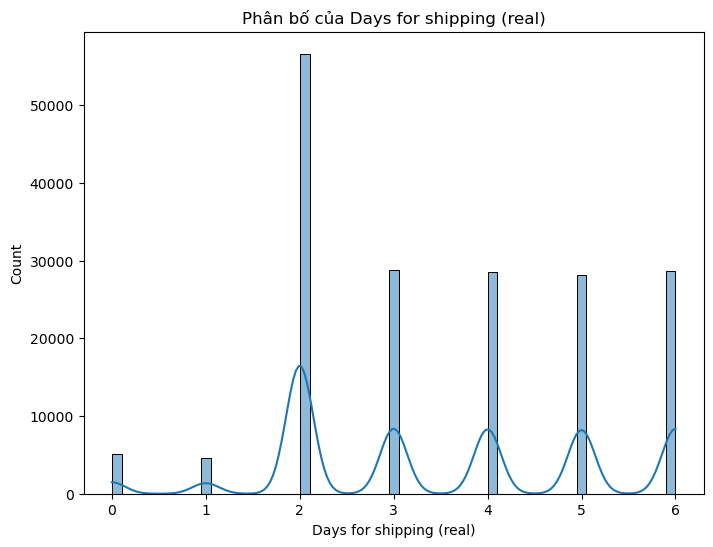

Thống kê cho cột Days for shipment (scheduled): 
count    180519.000000
mean          2.931847
std           1.374449
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days for shipment (scheduled), dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


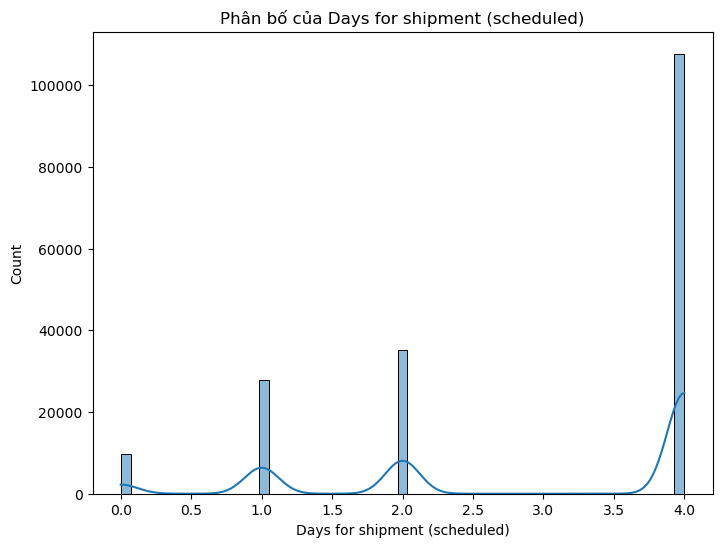

Thống kê cho cột Benefit per order: 
count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Benefit per order, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


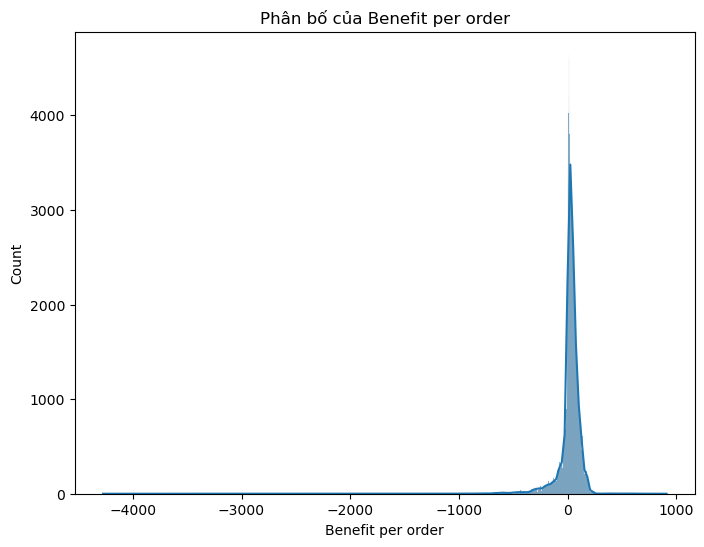

Thống kê cho cột Sales per customer: 
count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


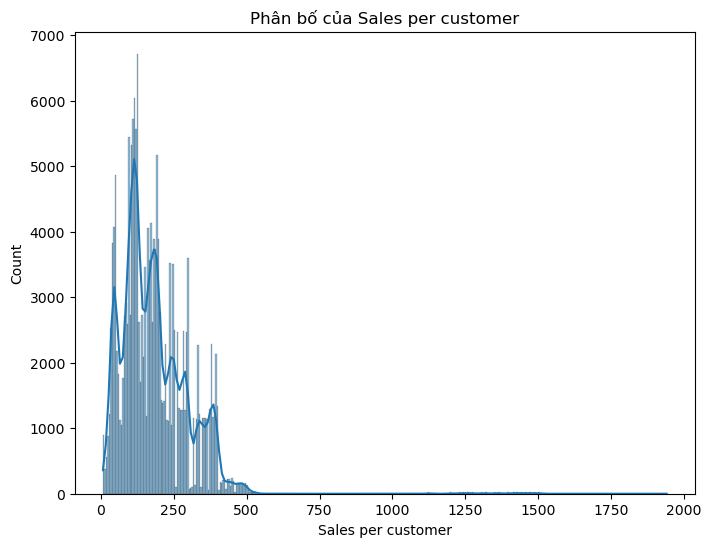

Thống kê cho cột Late_delivery_risk: 
count    180519.000000
mean          0.548291
std           0.497664
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Late_delivery_risk, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


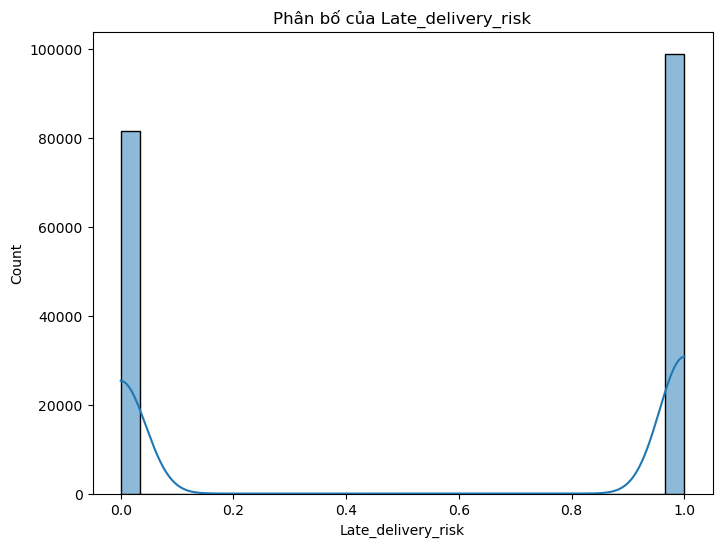

Thống kê cho cột Category Id: 
count    180519.000000
mean         31.851451
std          15.640064
min           2.000000
25%          18.000000
50%          29.000000
75%          45.000000
max          76.000000
Name: Category Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


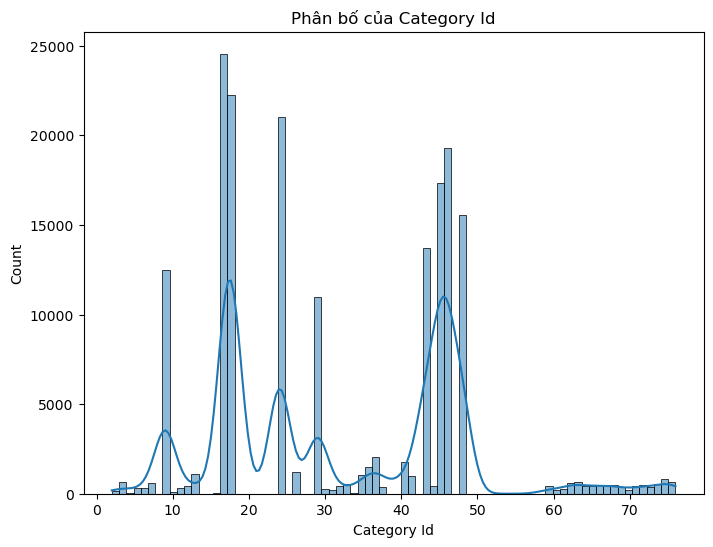

Thống kê cho cột Customer Id: 
count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Customer Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


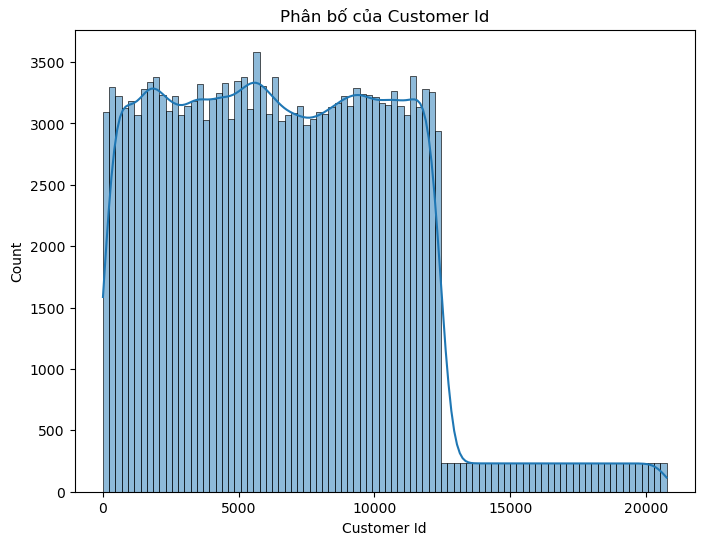

Thống kê cho cột Customer Zipcode: 
count    180516.000000
mean      35921.126914
std       37542.461122
min         603.000000
25%         725.000000
50%       19380.000000
75%       78207.000000
max       99205.000000
Name: Customer Zipcode, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


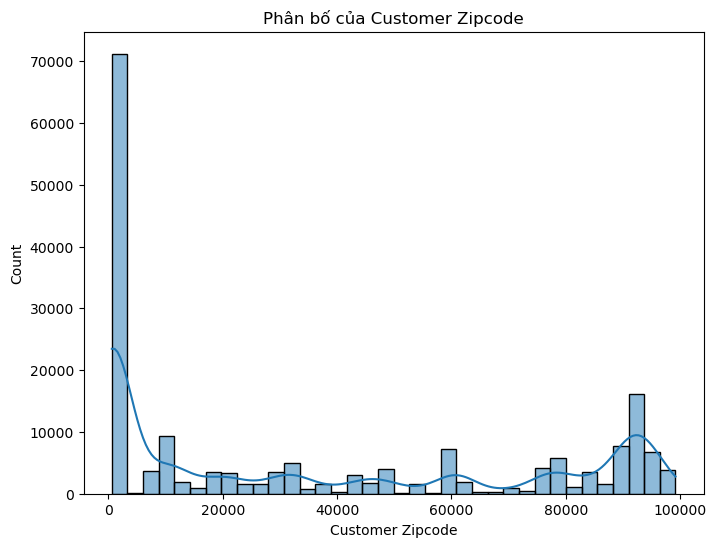

Thống kê cho cột Department Id: 
count    180519.000000
mean          5.443460
std           1.629246
min           2.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          12.000000
Name: Department Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


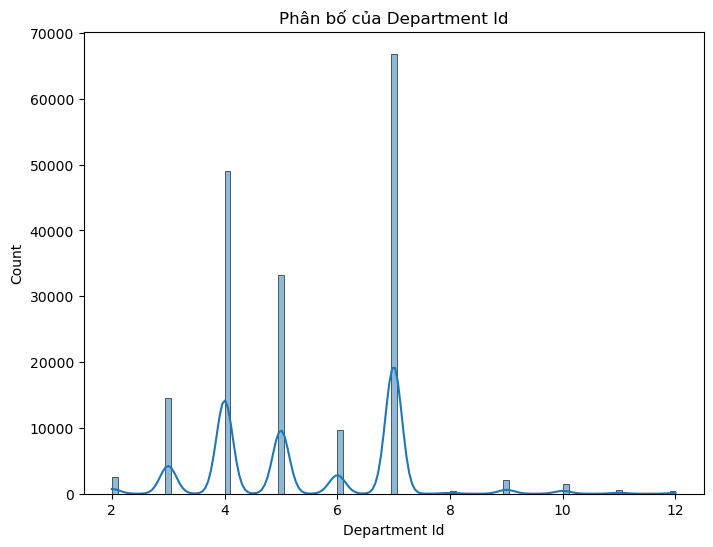

Thống kê cho cột Latitude: 
count    180519.000000
mean         29.719955
std           9.813646
min         -33.937553
25%          18.265432
50%          33.144863
75%          39.279617
max          48.781933
Name: Latitude, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


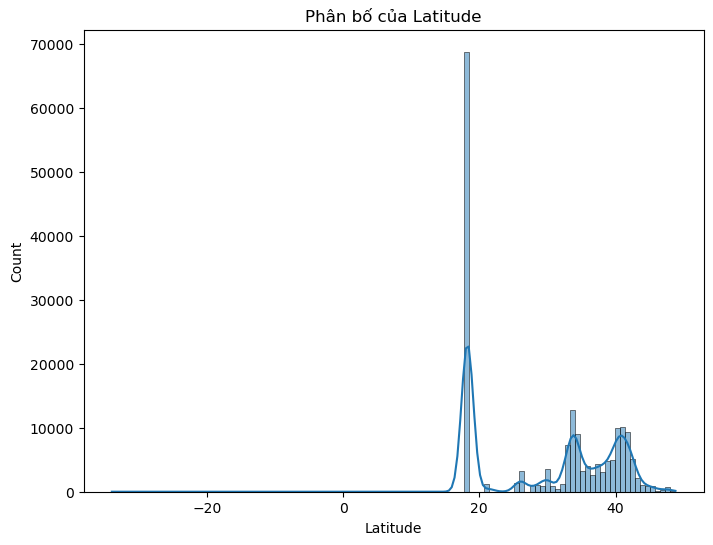

Thống kê cho cột Longitude: 
count    180519.000000
mean        -84.915675
std          21.433241
min        -158.025986
25%         -98.446312
50%         -76.847908
75%         -66.370583
max         115.263077
Name: Longitude, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


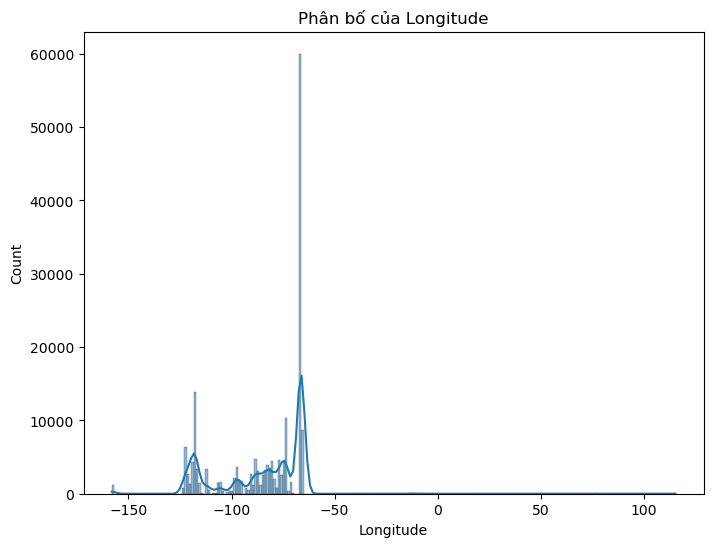

Thống kê cho cột Order Customer Id: 
count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Order Customer Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


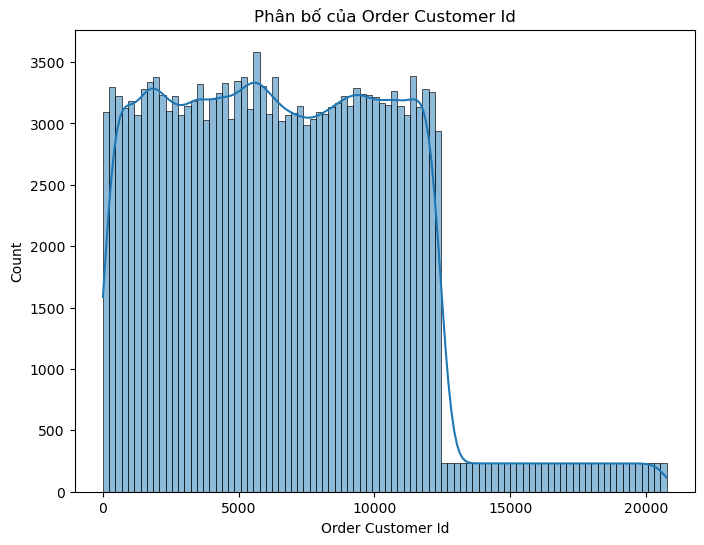

Thống kê cho cột Order Id: 
count    180519.000000
mean      36221.894903
std       21045.379569
min           1.000000
25%       18057.000000
50%       36140.000000
75%       54144.000000
max       77204.000000
Name: Order Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


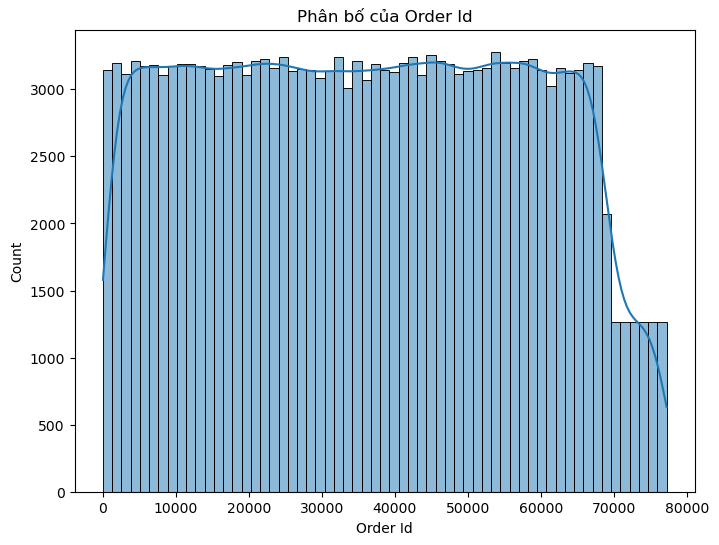

Thống kê cho cột Order Item Cardprod Id: 
count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Order Item Cardprod Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


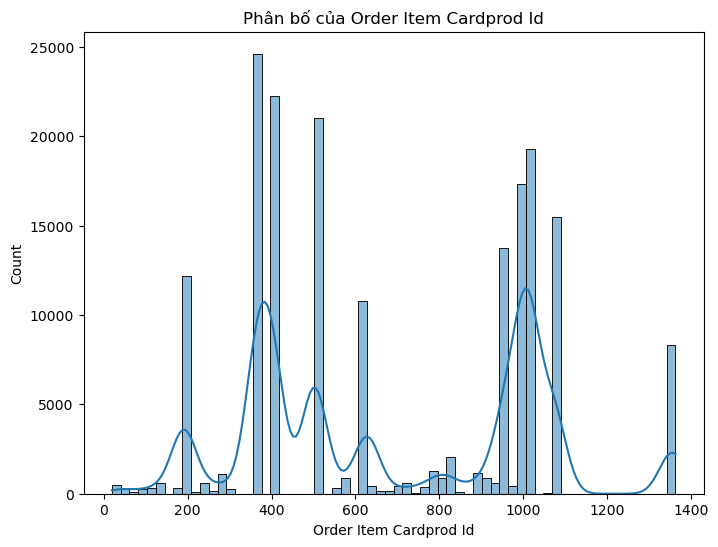

Thống kê cho cột Order Item Discount: 
count    180519.000000
mean         20.664741
std          21.800901
min           0.000000
25%           5.400000
50%          14.000000
75%          29.990000
max         500.000000
Name: Order Item Discount, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


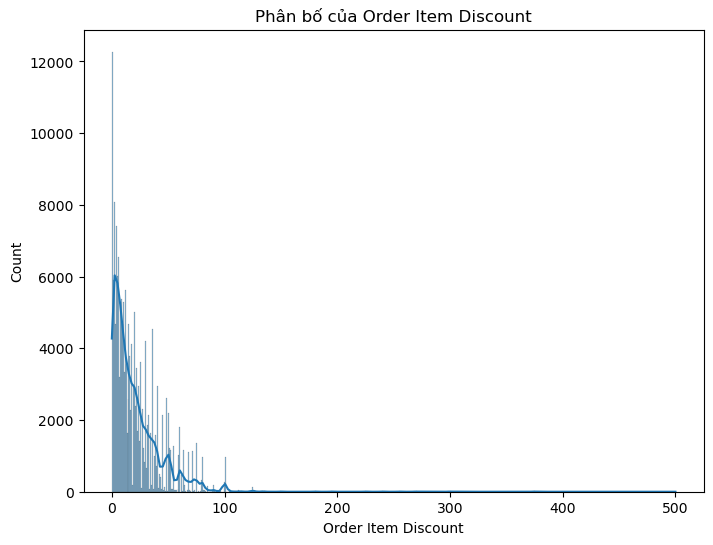

Thống kê cho cột Order Item Discount Rate: 
count    180519.000000
mean          0.101668
std           0.070415
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Order Item Discount Rate, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


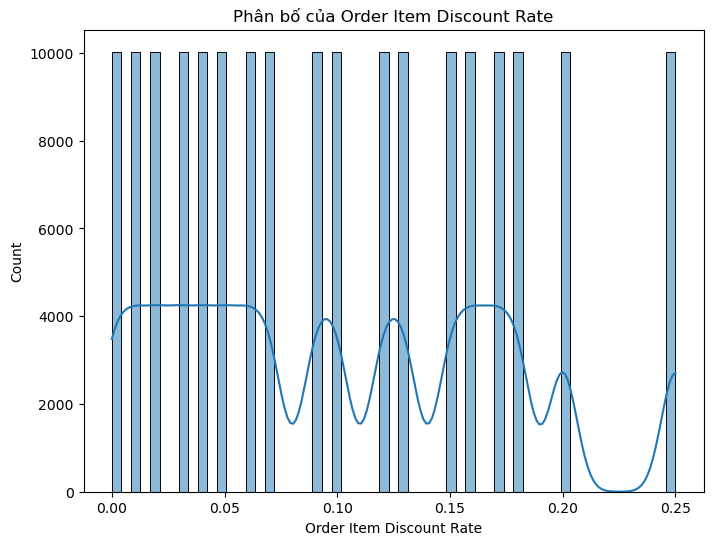

Thống kê cho cột Order Item Id: 
count    180519.000000
mean      90260.000000
std       52111.490959
min           1.000000
25%       45130.500000
50%       90260.000000
75%      135389.500000
max      180519.000000
Name: Order Item Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


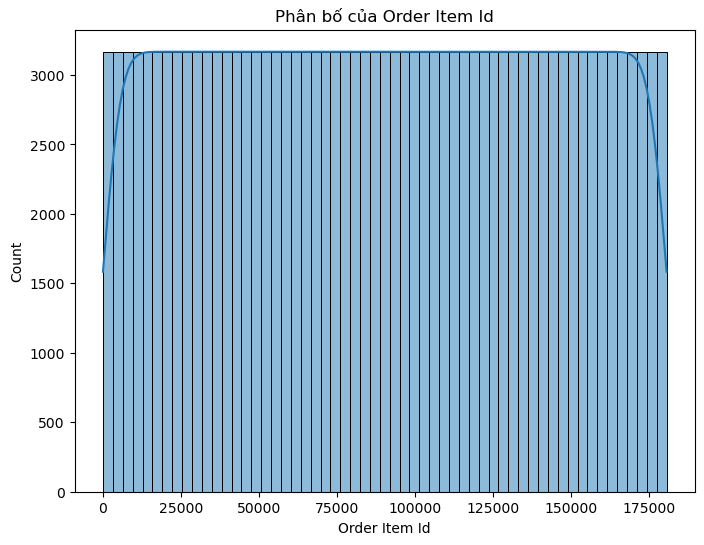

Thống kê cho cột Order Item Product Price: 
count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Order Item Product Price, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


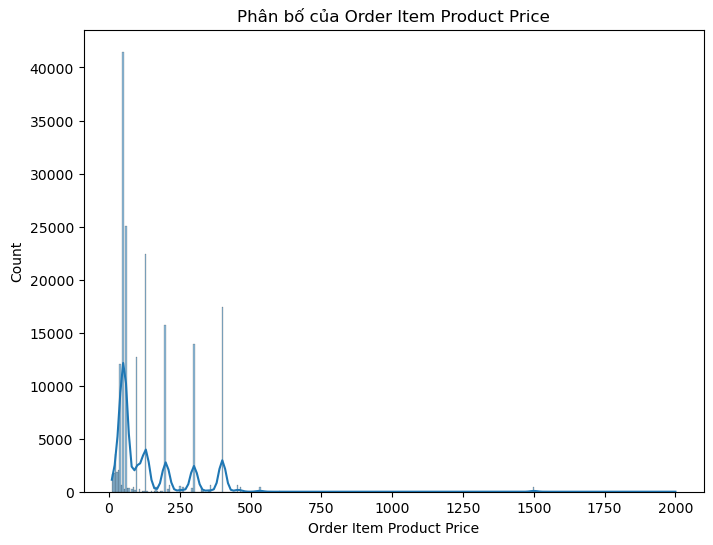

Thống kê cho cột Order Item Profit Ratio: 
count    180519.000000
mean          0.120647
std           0.466796
min          -2.750000
25%           0.080000
50%           0.270000
75%           0.360000
max           0.500000
Name: Order Item Profit Ratio, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


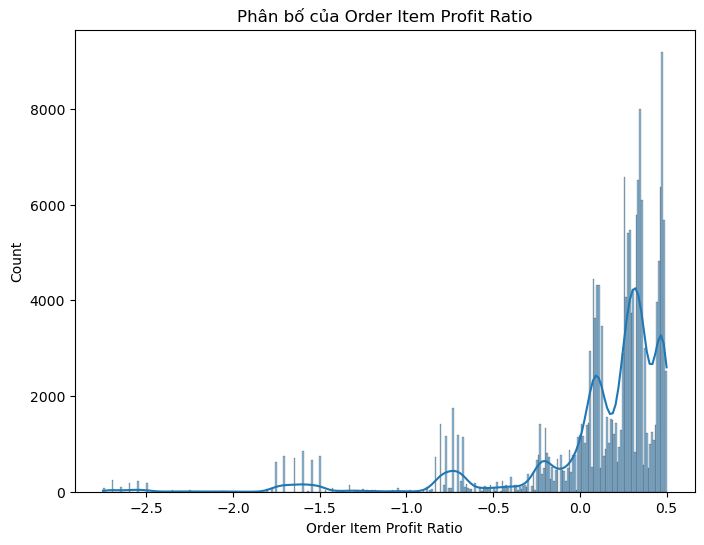

Thống kê cho cột Order Item Quantity: 
count    180519.000000
mean          2.127638
std           1.453451
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           5.000000
Name: Order Item Quantity, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


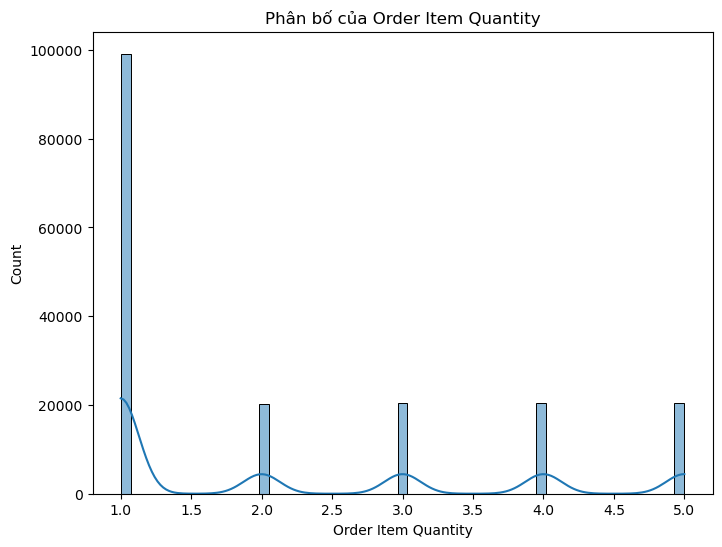

Thống kê cho cột Sales: 
count    180519.000000
mean        203.772096
std         132.273077
min           9.990000
25%         119.980003
50%         199.919998
75%         299.950012
max        1999.989990
Name: Sales, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


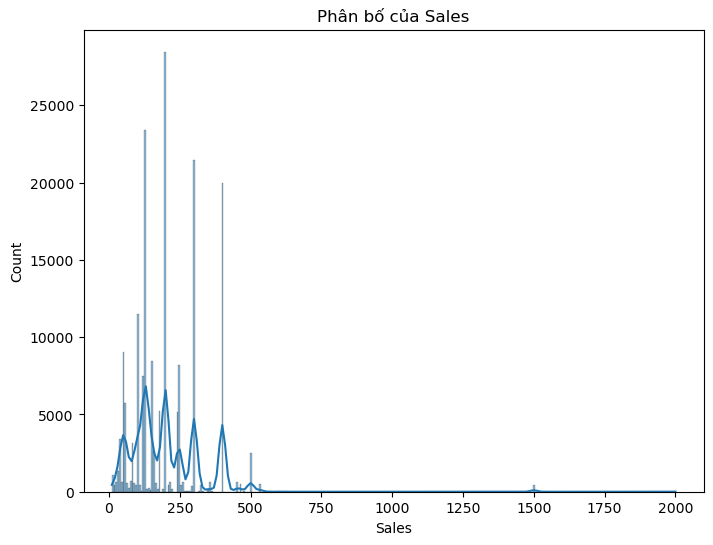

Thống kê cho cột Order Item Total: 
count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Order Item Total, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


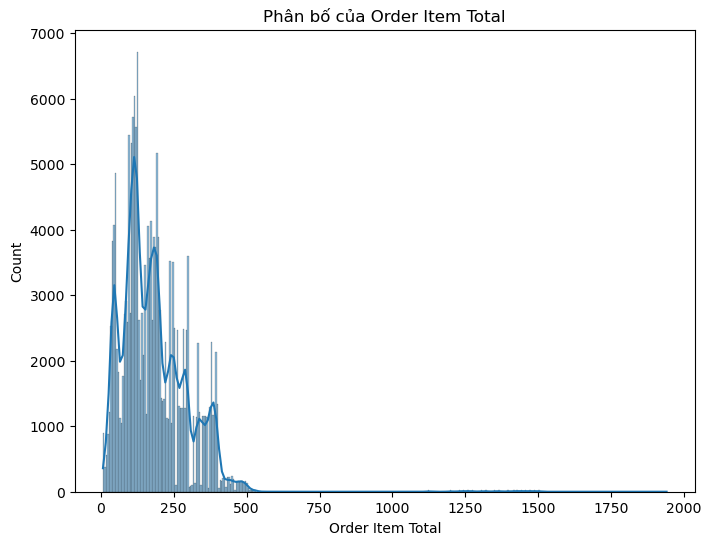

Thống kê cho cột Order Profit Per Order: 
count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Order Profit Per Order, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


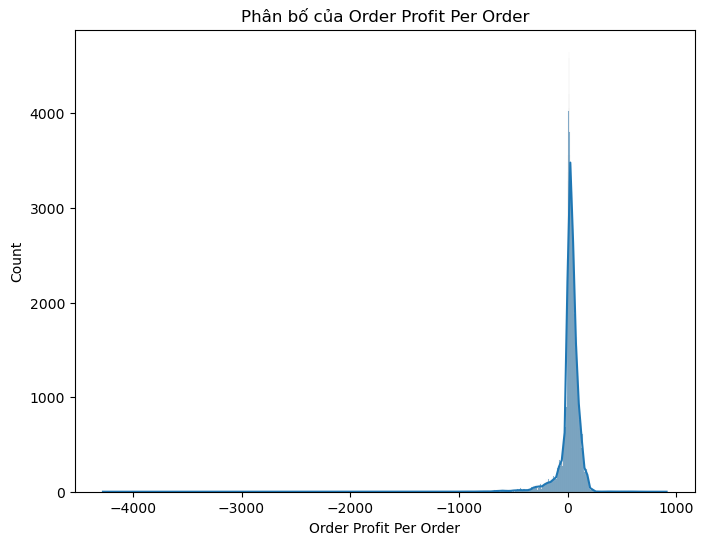

Thống kê cho cột Order Zipcode: 
count    24840.000000
mean     55426.132327
std      31919.279101
min       1040.000000
25%      23464.000000
50%      59405.000000
75%      90008.000000
max      99301.000000
Name: Order Zipcode, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


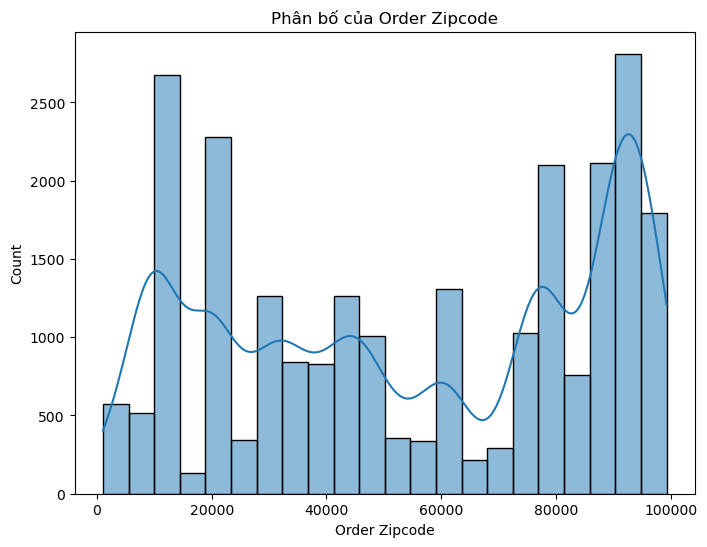

Thống kê cho cột Product Card Id: 
count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Product Card Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


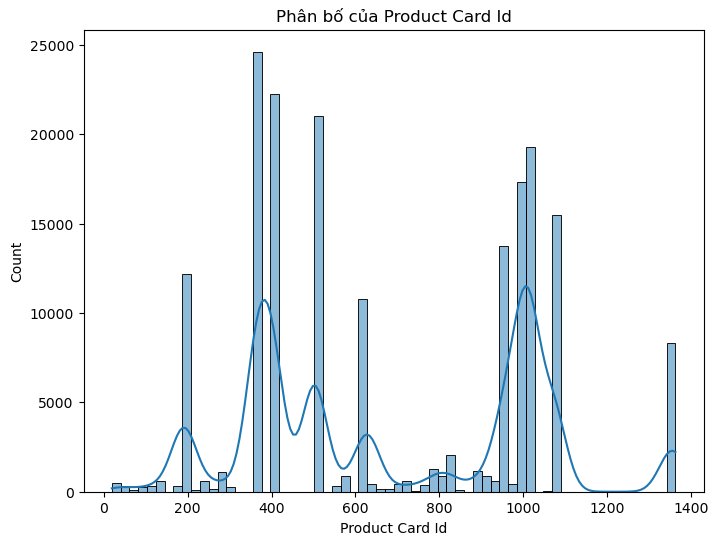

Thống kê cho cột Product Category Id: 
count    180519.000000
mean         31.851451
std          15.640064
min           2.000000
25%          18.000000
50%          29.000000
75%          45.000000
max          76.000000
Name: Product Category Id, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


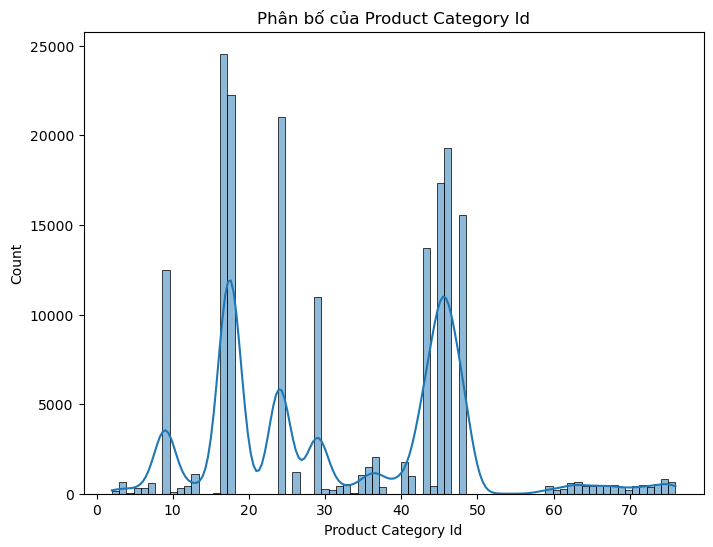

Thống kê cho cột Product Description: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Product Description, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


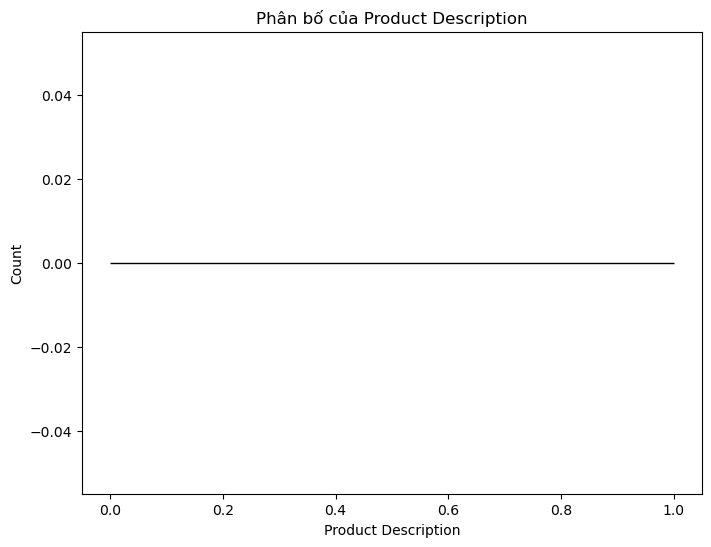

C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thống kê cho cột Product Price: 
count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64


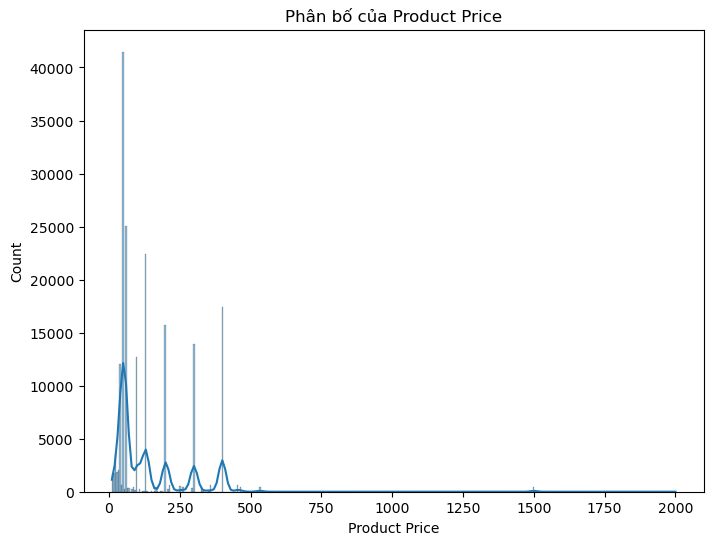

Thống kê cho cột Product Status: 
count    180519.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Product Status, dtype: float64


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


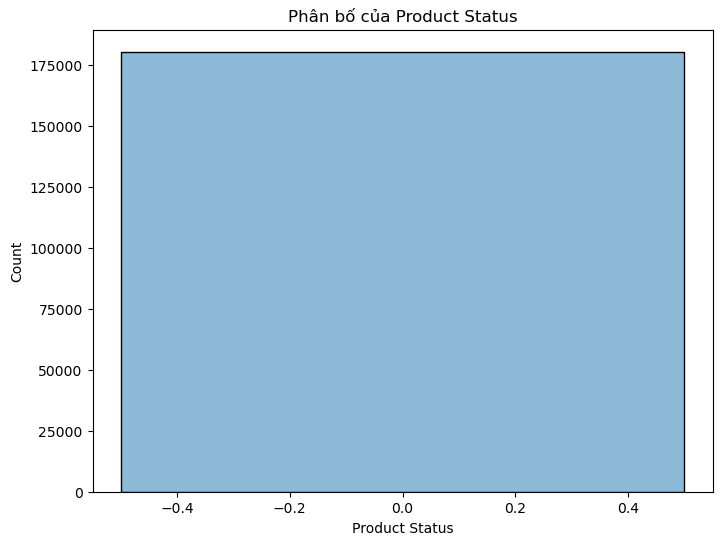

C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thống kê cho cột Delivery_Difference: 
count    180519.000000
mean          0.565807
std           1.490966
min          -2.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: Delivery_Difference, dtype: float64


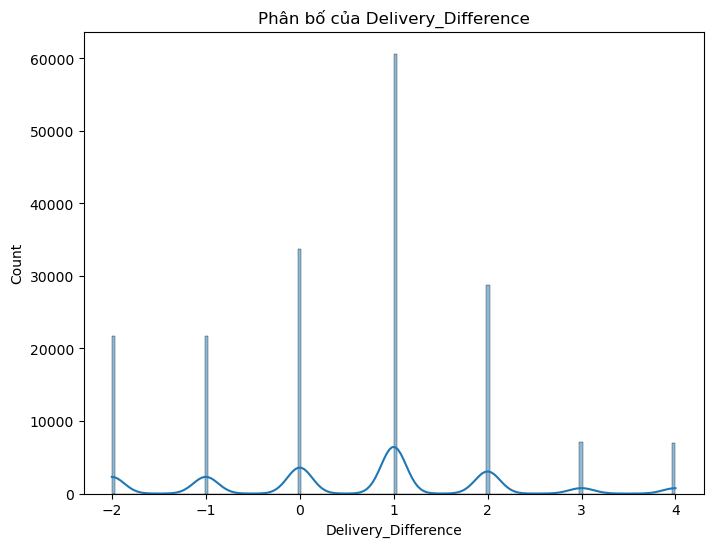

In [20]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Thống kê cho cột {column}: ")
        print(df[column].describe())
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f"Phân bố của {column}")
        plt.show()

Nhận xét:
1. Order Item Id:
- Phân bố gần như đều, không có giá trị nào quá lệch chuẩn.
- Có thể cho thấy mỗi đơn hàng có số lượng mặt hàng khác nhau.

2. Sales:
- Phân bố lệch phải (skewed right), với đa số đơn hàng có giá trị doanh thu thấp.
- Có một số ít đơn hàng có giá trị doanh thu cao hơn.
- Cho thấy phân phối doanh thu không đồng đều.

3. Order Item Quantity:
- Phân bố lệch phải (skewed right).
- Đa số đơn hàng có số lượng mặt hàng tương đối ít.
- Có một số ít đơn hàng có số lượng mặt hàng nhiều hơn.
- Cho thấy đa phần khách hàng mua với số lượng ít.

4. Discount Rate:
- Phân bố tập trung ở mức giá trị thấp (giảm giá ít).
- Một số ít đơn hàng có tỷ lệ giảm giá cao hơn.
- Cho thấy nhà cung cấp áp dụng chính sách giảm giá không thường xuyên hoặc giảm giá thấp.

5. Order Item Total:
- Phân bố lệch phải (skewed right).
- Đa số đơn hàng có tổng giá trị thấp.
- Có một số ít đơn hàng có tổng giá trị cao hơn.
- Cho thấy phân phối tổng giá trị đơn hàng không đồng đều.

6. Order Profit Per Order:
- Phân bố lệch phải (skewed right), với đa số đơn hàng có lợi nhuận thấp.
- Có một số ít đơn hàng có lợi nhuận cao hơn.
- Cho thấy phân phối lợi nhuận không đồng đều.

7. Delivery Days:
- Phân bố tập trung ở khoảng giá trị trung bình.
- Có một số ít đơn hàng có thời gian giao hàng dài hơn hoặc ngắn hơn.
- Cho thấy thời gian giao hàng tương đối ổn định.

8. Late_delivery_risk:
- Phân bố tập trung ở mức rủi ro giao hàng thấp.
- Một số ít đơn hàng có rủi ro giao hàng cao hơn.
- Cho thấy tỷ lệ đơn hàng bị giao hàng trễ thấp.

9. Order Item Discount Rate:
- Phân bố tập trung ở mức giá trị thấp (giảm giá ít).
- Một số ít đơn hàng có tỷ lệ giảm giá cao hơn.
- Cho thấy nhà cung cấp áp dụng chính sách giảm giá không thường xuyên hoặc giảm giá thấp.

10. Order Item Discount:
- Phân bố lệch phải (skewed right), với đa số đơn hàng có giá trị giảm giá thấp.
- Có một số ít đơn hàng có giá trị giảm giá cao hơn.
- Cho thấy phân phối giảm giá không đồng đều.

11. Order Item Profit Ratio:
- Phân bố lệch phải (skewed right), với đa số đơn hàng có tỷ lệ lợi nhuận thấp.
- Có một số ít đơn hàng có tỷ lệ lợi nhuận cao hơn.
- Cho thấy phân phối tỷ lệ lợi nhuận không đồng đều.

12. Order Item Product Price:
- Phân bố lệch phải (skewed right), với đa số đơn hàng có giá sản phẩm thấp.
- Có một số ít đơn hàng có giá sản phẩm cao hơn.
- Cho thấy phân phối giá sản phẩm không đồng đều.

Thống kê tình trạng đơn hàng

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


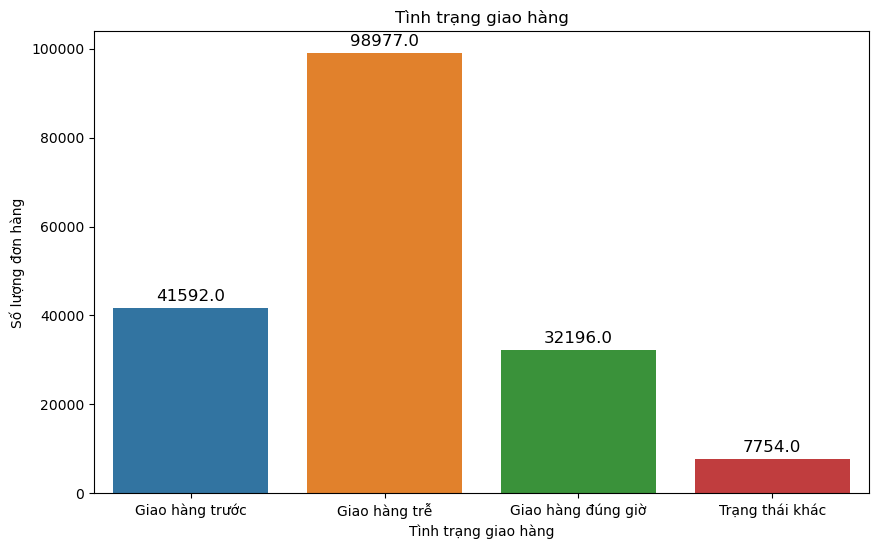

In [21]:
# Thống kê tình trạng giao hàng
delivery_status_counts = df['Delivery Status'].value_counts()
print(delivery_status_counts)

# Vẽ biểu đồ cột cho tình trạng giao hàng
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Delivery Status', data=df)

# Gán nhãn số lượng trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Đổi tên các trạng thái giao hàng chỉ trong biểu đồ
unique_statuses = df['Delivery Status'].unique()
ax.set_xticks(range(len(unique_statuses)))
ax.set_xticklabels(['Giao hàng trước', 'Giao hàng trễ', 'Giao hàng đúng giờ', 'Trạng thái khác'])

# Thiết lập tiêu đề và nhãn
plt.title('Tình trạng giao hàng')
plt.xlabel('Tình trạng giao hàng')
plt.ylabel('Số lượng đơn hàng')

# Lưu biểu đồ nếu cần
plt.savefig('delivery_status_chart.png', bbox_inches='tight')

# Hiển thị biểu đồ
plt.show()


C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


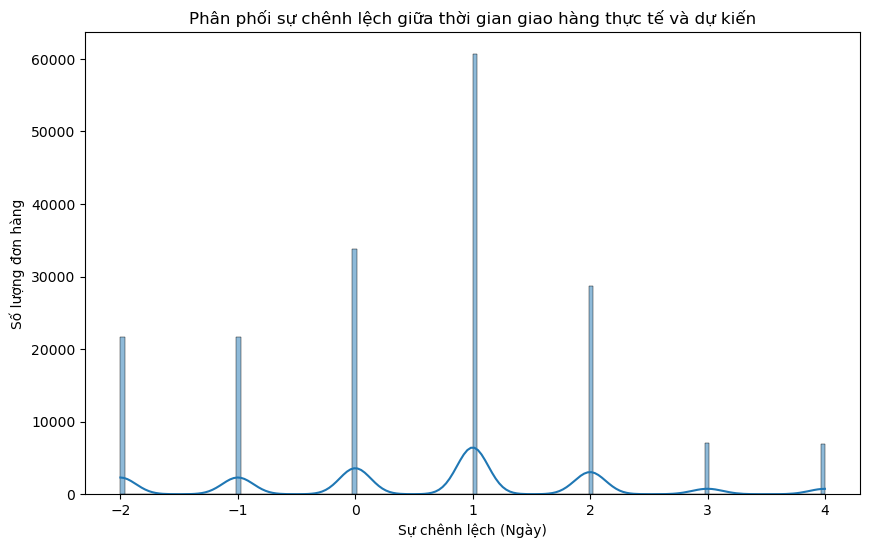

Delivery_Difference
 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: count, dtype: int64


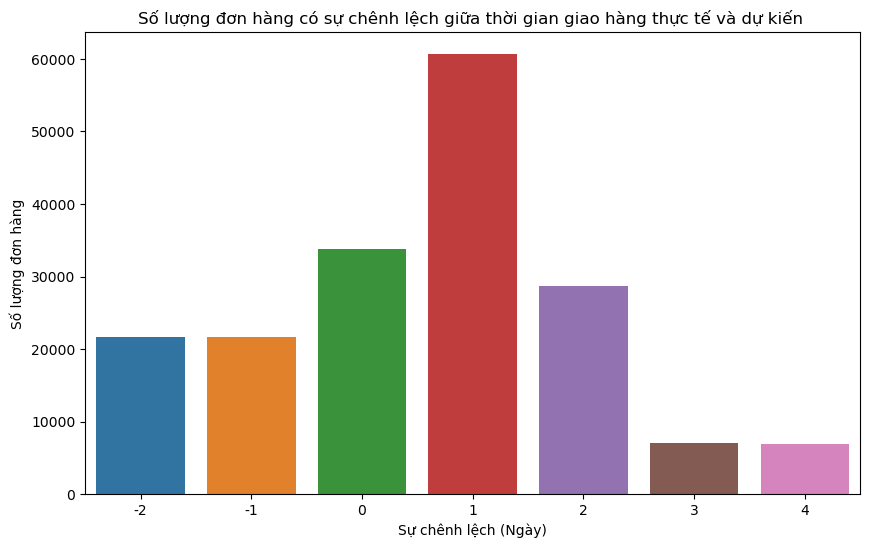

In [22]:
#Thống kê sự chênh lệch giữa thời gian giao hàng dự kiến và thực tế

df['Delivery_Difference'] = (df['Days for shipping (real)'] - df['Days for shipment (scheduled)'])

# Tạo biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Difference'], kde=True)
plt.title('Phân phối sự chênh lệch giữa thời gian giao hàng thực tế và dự kiến')
plt.xlabel('Sự chênh lệch (Ngày)')
plt.ylabel('Số lượng đơn hàng')
plt.show()

# Thống kê số lượng đơn hàng có sự chênh lệch
delivery_difference_counts = df['Delivery_Difference'].value_counts()
print(delivery_difference_counts)

# Vẽ biểu đồ countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery_Difference', data=df)
plt.title('Số lượng đơn hàng có sự chênh lệch giữa thời gian giao hàng thực tế và dự kiến ')
plt.xlabel('Sự chênh lệch (Ngày)')
plt.ylabel('Số lượng đơn hàng')
plt.show()


# Nhận xét biểu đồ phân phối sự chênh lệch giữa thời gian giao hàng dự kiến và thực tế:

1. Phân phối:
- Biểu đồ cho thấy phân phối sự chênh lệch giữa thời gian giao hàng dự kiến và thực tế có xu hướng tập trung chủ yếu quanh giá trị 0, nghĩa là phần lớn các đơn hàng được giao đúng hoặc gần đúng với thời gian dự kiến.
- Tuy nhiên, có một số đơn hàng có sự chênh lệch lớn hơn, cả về giao hàng sớm và giao hàng muộn.

2. Xu hướng:
- Có thể thấy sự chênh lệch về thời gian giao hàng chủ yếu tập trung trong khoảng từ -1 đến +1 ngày, với số lượng đơn hàng có sự chênh lệch này cao hơn các khoảng giá trị khác.
- Có một lượng nhỏ đơn hàng có sự chênh lệch giao hàng rất lớn, giao muộn vượt quá 3 ngày

3. Ý nghĩa:
- Phân phối này cho thấy rằng nhà cung cấp có thể kiểm soát được thời gian giao hàng trong một phạm vi nhất định.
- Tuy nhiên, vẫn có một số trường hợp giao hàng không đúng hạn hoặc có sự chậm trễ đáng kể.
- Việc phân tích những đơn hàng có sự chênh lệch lớn hơn (vượt quá 3 ngày) sẽ giúp tìm ra nguyên nhân và đưa ra giải pháp để cải thiện quá trình giao hàng, hạn chế tối đa tình trạng giao hàng trễ.

Kết luận:
- Phân phối sự chênh lệch thời gian giao hàng cho thấy khả năng kiểm soát của nhà cung cấp đối với thời gian giao hàng.
- Tuy nhiên, vẫn cần quan tâm đến những đơn hàng có sự chênh lệch lớn hơn để tìm ra nguyên nhân và cải thiện chất lượng dịch vụ giao hàng.

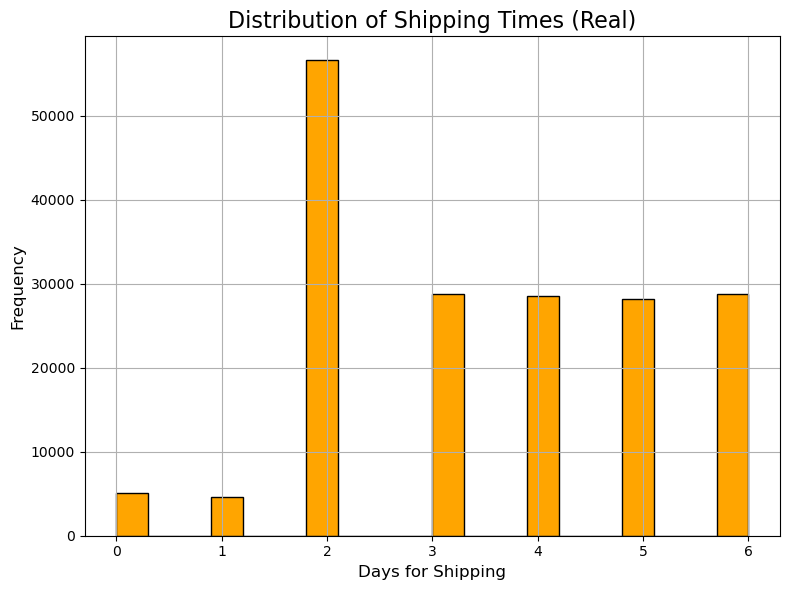

In [26]:
#SỰ CHÊNH LỆCH GIỮA THỜI GIAN GIAO HÀNG SỚM NHẤT VÀ GIAO HÀNG MUỘN NHẤT
plt.figure(figsize=(8,6))
df['Days for shipping (real)'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Shipping Times (Real)', fontsize=16)
plt.xlabel('Days for Shipping', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


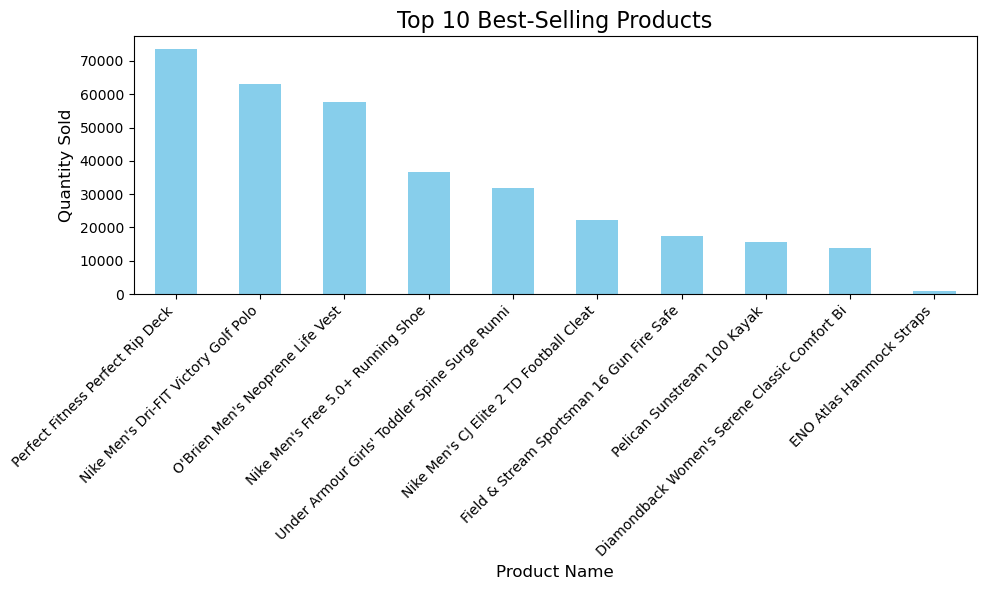

In [24]:
#10 SẢN PHẨM ĐƯỢC BÁN NHIỀU NHẤT
# Group by 'Product Name' and sum the 'Order Item Quantity'
top_selling_products = df.groupby('Product Name')['Order Item Quantity'].sum().sort_values(ascending=False)

# Select the top 10 best-selling products for visualization
top_10_products = top_selling_products.head(10)

# Create a bar chart to visualize the top-selling products
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


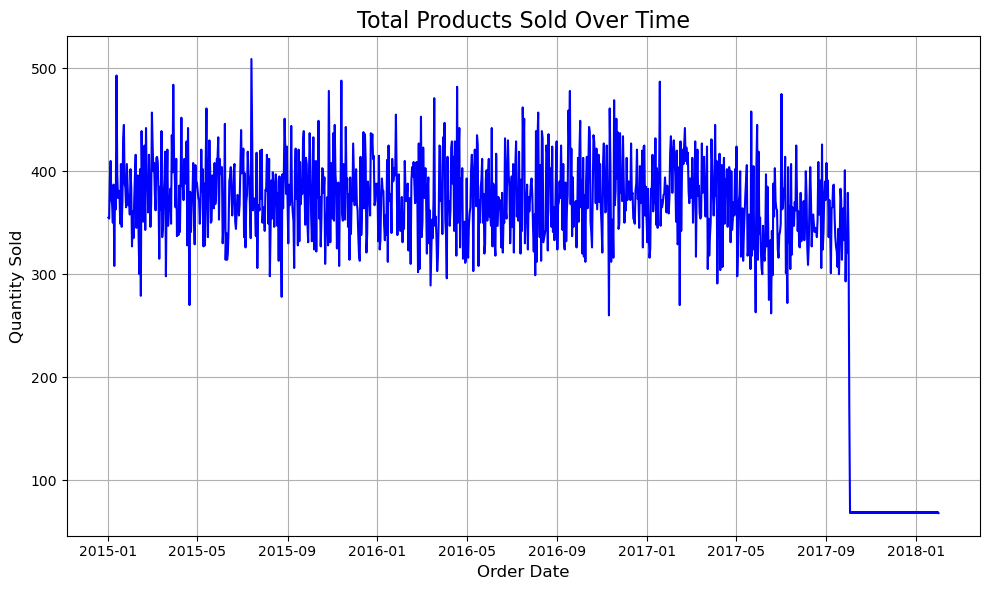

In [25]:
#THỜI GIAN SẢN PHẨM ĐƯỢC BÁN RA NHIỀU NHẤT
# Convert 'order date (DateOrders)' column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Group by order date and sum the 'Order Item Quantity'
sales_by_date = df.groupby(df['order date (DateOrders)'].dt.date)['Order Item Quantity'].sum()

# Create a time series plot
plt.figure(figsize=(10,6))
sales_by_date.plot(kind='line', color='blue')
plt.title('Total Products Sold Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
